In [32]:
from greensight.utils import DIR_DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from pathlib import Path

In [35]:
def save_figure(fig, directory, filename):
    # Ensure the directory exists
    directory.mkdir(parents=True, exist_ok=True)
    
    # Define file paths
    pdf_path = directory / f"{filename}.pdf"
    png_path = directory / f"{filename}.png"
    
    # Save the figure
    fig.tight_layout()  # Adjust the layout
    fig.savefig(pdf_path, format='pdf', bbox_inches='tight')
    fig.savefig(png_path, format='png', dpi=300, bbox_inches='tight')  # 300 DPI for high resolution
    
    print(f"Figure saved as:\n- {pdf_path}\n- {png_path}")

In [ ]:
def save_figure(fig, directory, filename):
    # Ensure the directory exists
    directory.mkdir(parents=True, exist_ok=True)
    
    # Define file paths
    pdf_path = os.path.join(directory, f"{filename}.pdf")
    png_path = os.path.join(directory, f"{filename}.png")
    
    # Save the figure
    fig.tight_layout()  # Adjust the layout
    fig.savefig(pdf_path, format='pdf', bbox_inches='tight')
    fig.savefig(png_path, format='png', dpi=300, bbox_inches='tight')  # 300 DPI for high resolution
    
    print(f"Figure saved as:\n- {pdf_path}\n- {png_path}")

In [34]:
DIR_FIGS = Path("/home/finley/Work/RDS/greensight/documents/presentation/figures")

In [2]:
path_in = DIR_DATA / "processed_data/sentinel_one_all.hdf"
df = pd.read_hdf(path_in, key="df")
df.head(5)

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2017-04-01        20.513539   0.867165 -18.399888 -22.760538 -12.631246   
2017-05-01        20.547113   0.877612 -18.302422 -22.184896 -12.572460   
2017-06-01        20.593652   0.891680 -17.865307 -21.927412 -12.237822   
2017-07-01        20.628014   0.900990 -17.279926 -21.967014 -11.598811   
2017-08-01        20.635065   0.909481 -18.390791 -21.526890 -12.278289   

greenbelt                                                                ...  \
band            VVDes          B1          B11          B12          B2  ...   
2017-04-01 -18.038478  249.901535  1972.478632  1085.123853  334.255209  ...   
2017-05-01 -17.411590  211.897609  1967.190929  1038.574691  308.149490  ...   
2017-06-01 -17.332710  308.439303  2200.748940  1170.853821  377.986567  ...   
2017-07-01 -17.204130  409.558347  1943.604229  1027.210660  432.151726  ...   
2017-08-01 -16.212963    0.000000     0.000000     0.000000    0.000000  ...   

greenbelt          York                                                   \
band                B12          B2          B3          B4           B5   
2017-04-01  1405.222102  745.036557  926.637125  942.498735  1364.350624   
2017-05-01  1084.022860  313.625033  597.950340  458.579441  1034.087461   
2017-06-01     0.000000    0.000000    0.000000    0.000000     0.000000   
2017-07-01     0.000000    0.000000    0.000000    0.000000     0.000000   
2017-08-01  1099.660178  389.396428  688.404120  617.261830  1165.117727   

greenbelt                                                                    
band                 B6           B7           B8          B8A           B9  
2017-04-01  2161.542955  2424.795836  2639.052064  2624.356439  2392.457761  
2017-05-01  2843.418180  3514.788236  3692.466502  3758.173894  3793.851860  
2017-06-01     0.000000     0.000000     0.000000     0.000000     0.000000  
2017-07-01     0.000000     0.000000     0.000000     0.000000     0.000000  
2017-08-01  2523.395321  2938.356325  3126.534798  3194.866661  2835.513223  

[5 rows x 288 columns]

In [3]:
df = df.replace(0., np.nan)

In [4]:
df_interp = df.interpolate(method='linear', limit_direction='forward', axis=0)

In [5]:
df_interp.iloc[:5, :18]

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2017-04-01        20.513539   0.867165 -18.399888 -22.760538 -12.631246   
2017-05-01        20.547113   0.877612 -18.302422 -22.184896 -12.572460   
2017-06-01        20.593652   0.891680 -17.865307 -21.927412 -12.237822   
2017-07-01        20.628014   0.900990 -17.279926 -21.967014 -11.598811   
2017-08-01        20.635065   0.909481 -18.390791 -21.526890 -12.278289   

greenbelt                                                                \
band            VVDes          B1          B11          B12          B2   
2017-04-01 -18.038478  249.901535  1972.478632  1085.123853  334.255209   
2017-05-01 -17.411590  211.897609  1967.190929  1038.574691  308.149490   
2017-06-01 -17.332710  308.439303  2200.748940  1170.853821  377.986567   
2017-07-01 -17.204130  409.558347  1943.604229  1027.210660  432.151726   
2017-08-01 -16.212963  345.559891  1952.066124  1040.155155  407.828245   

greenbelt                                                                  \
band                B3          B4           B5           B6           B7   
2017-04-01  654.931895  460.984134  1148.068462  3144.343159  3760.447891   
2017-05-01  651.757255  443.820549  1167.911370  3327.710876  4043.394015   
2017-06-01  748.063793  569.029181  1315.866520  3403.160187  4091.690101   
2017-07-01  698.086884  519.541923  1164.372435  2941.104795  3475.355071   
2017-08-01  691.531989  504.369011  1155.996405  2955.778450  3487.171733   

greenbelt                                          
band                 B8          B8A           B9  
2017-04-01  4026.297155  4065.410680  4105.513748  
2017-05-01  4205.366154  4346.570440  4382.750088  
2017-06-01  4202.619348  4456.103986  4556.237335  
2017-07-01  3619.433803  3765.371885  3787.583018  
2017-08-01  3650.009111  3783.340573  3805.170243

In [6]:
greenbelts = set([i[0] for i in df.columns])
greenbelts

{'Bath and Bristol',
 'Birmingham',
 'Blackpool',
 'Burton upon Trent and Swadlincote',
 'Cambridge',
 'Carnforth Lancaster and Morecambe',
 'Cheltenham and Gloucester',
 'Derby and Nottingham',
 'London',
 'Merseyside and Greater Manchester',
 'Oxford',
 'South West Hampshire',
 'South and West Yorkshire',
 'Stoke on Trent',
 'Tyne and Wear',
 'York'}

In [8]:
DF = []
corr = []
for gb in greenbelts:
    df_gb = df_interp[gb]
    # df_normalized = (df_gb - df_gb.min()) / (df_gb.max() - df_gb.min())

    DF.append(df_gb)
    c = df_gb.corr()[:2].T[2:]
    corr.append(c.values)

# DF = np.array(DF)
corr = np.array(corr)

In [ ]:
df_mean = pd.concat(DF).groupby(level=0).mean()
df_std = pd.concat(DF).groupby(level=0).std()

band,soil,vegetation,VHAsc,VHDes,VVAsc,VVDes,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9
2017-04-01,16.784937,0.780834,-19.057829,-20.291214,-13.104609,-14.480387,307.910586,1882.827708,1126.625974,375.057031,654.642336,549.100730,1121.565491,2672.145463,3169.608336,3416.123289,3418.190709,3421.824386
2017-05-01,16.816847,0.790132,-19.079390,-20.171222,-13.446970,-14.579222,239.652903,1869.243625,1033.907946,317.686969,625.531410,467.311862,1106.705518,2988.805453,3645.453523,3828.923175,3913.183787,3938.210233
2017-06-01,16.849361,0.802695,-18.050612,-19.315908,-12.412339,-13.903006,212.673143,1643.290082,913.825766,294.691105,559.838243,434.886208,973.627678,2520.906667,3050.464912,3192.076600,3286.556174,3297.266720
2017-07-01,16.874868,0.811611,-18.085508,-19.227049,-12.337070,-13.640947,216.571872,1587.206981,895.183019,307.900166,550.290863,449.499691,940.595788,2284.648138,2720.774089,2852.685965,2942.869183,2935.091969
2017-08-01,16.883154,0.818555,-18.673136,-19.272835,-12.413406,-13.280202,212.007194,1622.865858,927.177227,327.251733,568.931971,476.755681,955.903154,2217.940663,2606.541630,2726.240928,2829.923560,2809.019914


In [49]:
df_std

band,soil,vegetation,VHAsc,VHDes,VVAsc,VVDes,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9
2017-04-01,3.719905,0.337883,1.874688,1.982478,2.179211,2.508801,156.667846,376.333500,276.182484,137.421289,154.732842,192.567572,235.185661,547.932533,670.286669,717.768071,721.384038,747.254286
2017-05-01,3.722399,0.338662,1.874619,1.777731,2.239864,2.220970,88.011188,272.619226,182.847544,100.004526,117.443385,126.932444,176.013269,405.069802,493.779490,527.618622,536.906577,537.786973
2017-06-01,3.728781,0.341564,2.269354,1.911016,2.524377,2.317240,86.831250,636.159579,353.831158,119.587596,215.690817,178.344113,374.250160,962.059165,1157.772074,1219.430284,1252.967817,1263.410661
2017-07-01,3.733729,0.343773,2.627664,1.988189,2.916916,2.411152,103.518443,703.486162,408.743294,133.767220,234.078697,204.304771,400.731109,993.165484,1186.134742,1248.980879,1284.562842,1288.824636
2017-08-01,3.735148,0.346018,2.147961,1.714468,2.517677,2.070395,108.372847,703.936831,439.365781,135.753898,226.928355,221.778090,389.066059,927.127512,1100.330293,1160.381500,1195.841794,1198.217481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,3.698006,0.346975,0.700791,0.744151,0.492121,0.566196,159.622071,635.794242,376.531180,162.960879,234.662011,207.363951,374.553743,896.207830,1085.325302,1128.804059,1170.706715,1182.656876
2023-09-01,3.704578,0.348544,0.794785,0.629318,0.605314,0.567195,85.615376,196.460180,204.417058,64.938312,65.819728,127.862010,85.430090,351.789731,469.498690,455.096901,472.745906,478.973761
2023-10-01,3.700969,0.348728,0.742099,0.650991,0.566330,0.587481,159.980916,496.412805,310.856800,120.849289,119.634899,138.544891,208.652701,542.139132,663.797428,707.036603,739.270003,760.892097
2023-11-01,3.693145,0.346983,0.503985,0.642120,0.475786,0.496409,115.843669,110.840610,77.980220,98.171343,78.298708,102.434851,82.489882,221.364862,276.695698,299.755063,293.964715,293.543347


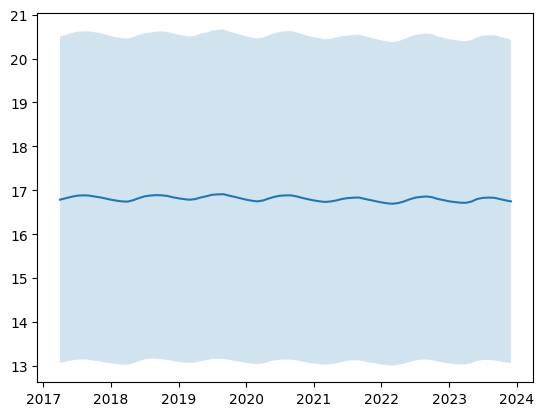

In [48]:
fig, ax = plt.subplots(1)
# ax2 = ax.twinx()

ax.plot(df_mean.index, df_mean["soil"])
ax.fill_between(df_std.index, df_mean["soil"]-df_std["soil"], df_mean["soil"]+df_std["soil"], alpha=0.2)


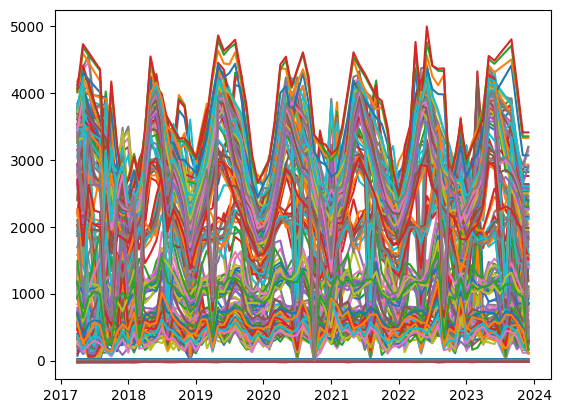

In [9]:
fig, ax = plt.subplots(1)

for df_i in DF:
    ax.plot(df_i)

Figure saved as:
- /home/finley/Work/RDS/greensight/documents/presentation/figures/00_JULES_output_single_gb.pdf
- /home/finley/Work/RDS/greensight/documents/presentation/figures/00_JULES_output_single_gb.png


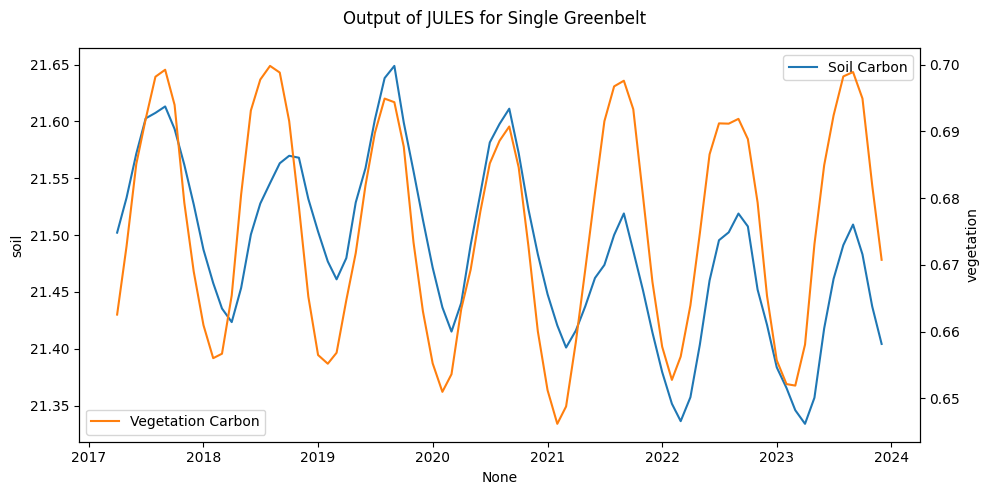

In [ ]:
df_n = 0
fig, ax = plt.subplots(1, figsize=[10, 5])
ax2 = ax.twinx()
sn.lineplot(data=DF[df_n], x=DF[df_n].index, y="soil", ax=ax, label="Soil Carbon")
sn.lineplot(data=DF[df_n], x=DF[df_n].index, y="vegetation", ax=ax2, c="C1", label="Vegetation Carbon")

fig.suptitle("Output of JULES for Single Greenbelt")
save_figure(fig=fig, directory=DIR_FIGS, filename="00_JULES_output_single_gb")

Figure saved as:
- /home/finley/Work/RDS/greensight/documents/presentation/figures/01_JULES_output_gb_comp.pdf
- /home/finley/Work/RDS/greensight/documents/presentation/figures/01_JULES_output_gb_comp.png


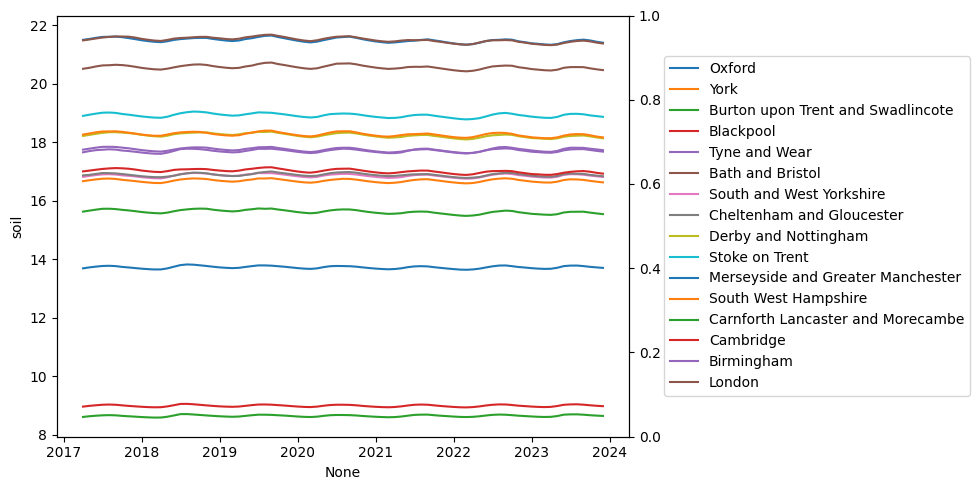

In [47]:
fig, ax = plt.subplots(1, figsize=[10, 5])
ax2 = ax.twinx()

for gb, df in zip(greenbelts, DF):
    sn.lineplot(data=df, x=df.index, y="soil", ax=ax, label=f"{gb}")

legend = ax.get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))
legend.set_loc('center left')

save_figure(fig=fig, directory=DIR_FIGS, filename="01_JULES_output_gb_comp")

Figure saved as:
- /home/finley/Work/RDS/greensight/documents/presentation/figures/03_sentinel_two_bands.pdf
- /home/finley/Work/RDS/greensight/documents/presentation/figures/03_sentinel_two_bands.png


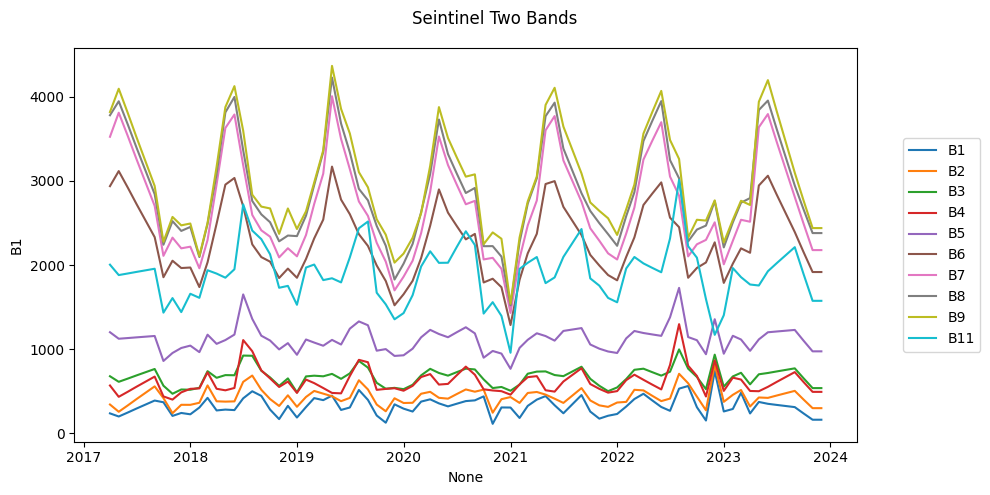

In [51]:

fig, ax = plt.subplots(1, figsize=[10, 5])
for bi in range(1, 12):
    try:
        sn.lineplot(data=DF[df_n], x=DF[df_n].index, y=f"B{bi}", label=f"B{bi}")
    except:
        pass
fig.suptitle("Seintinel Two Bands")
legend = ax.get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))
legend.set_loc('center left')

# sn.lineplot(data=DF[df_n], x=DF[df_n].index, y="B2", ax=ax2, c="C1")
save_figure(fig=fig, directory=DIR_FIGS, filename="03_sentinel_two_bands")

Figure saved as:
- /home/finley/Work/RDS/greensight/documents/presentation/figures/02_sentinel_one_bands.pdf
- /home/finley/Work/RDS/greensight/documents/presentation/figures/02_sentinel_one_bands.png


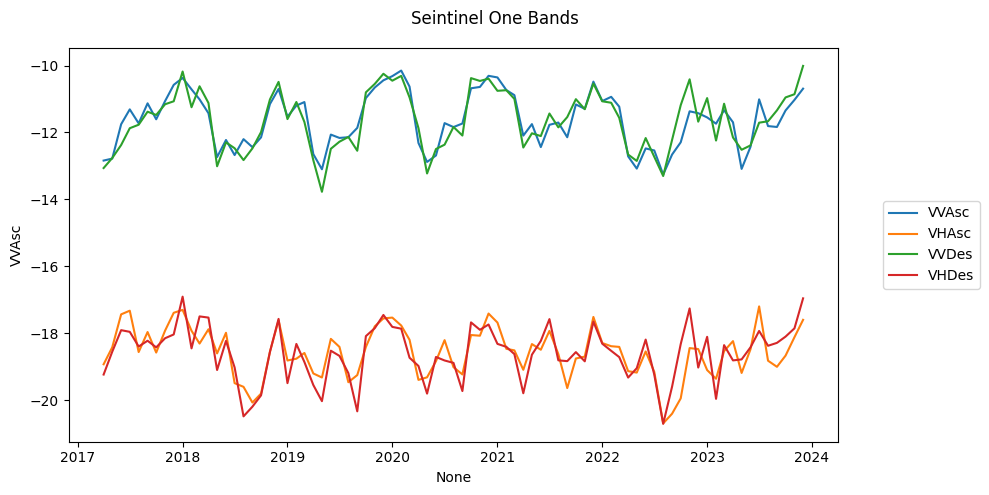

In [57]:
s1_bands = ["VVAsc", "VHAsc", "VVDes", "VHDes"]

fig, ax = plt.subplots(1, figsize=[10, 5])
for band_i in s1_bands:
    try:
        sn.lineplot(data=DF[df_n], x=DF[df_n].index, y=f"{band_i}", label=f"{band_i}")
    except:
        pass
fig.suptitle("Seintinel One Bands")
legend = ax.get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))
legend.set_loc('center left')

# sn.lineplot(data=DF[df_n], x=DF[df_n].index, y="B2", ax=ax2, c="C1")
save_figure(fig=fig, directory=DIR_FIGS, filename="02_sentinel_one_bands")
 